<a href="https://colab.research.google.com/github/NourhanTamer20/Credit_Card_Fraud_Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt

**Read Dataset**

In [3]:
#Read training data
train_data = pd.read_csv("/content/fraudTrain.csv", encoding='ISO-8859-1')
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [4]:
dtrainshape=train_data.shape
dtrainshape

(318000, 23)

In [5]:
#Read Test data
test_data = pd.read_csv("/content/fraudTest.csv", encoding='ISO-8859-1')
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [6]:
dtestshape=test_data.shape
dtestshape

(321840, 23)

In [8]:
#Concatenate the two datasets
combined_data = pd.concat([train_data, test_data], ignore_index=True)
combined_data


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639835,321835,2020-10-21 19:43:56,6592074504369261,fraud_Kub PLC,personal_care,26.86,Amanda,Molina,F,8425 Daniel Knolls Suite 288,...,40.0897,-74.9781,1526206.0,Commercial horticulturist,1972-05-23,419c86ca0f7dcb96e2c51956c0e95bfd,1.382385e+09,40.831548,-75.340142,0.0
639836,321836,2020-10-21 19:44:10,4653879239169997,"fraud_Heathcote, Yost and Kertzmann",shopping_net,8.81,Monica,Tucker,F,302 Christina Islands,...,37.0581,-86.1938,6841.0,"Therapist, sports",1999-06-06,34a8108dee94ae04f78b41fc3b62ac95,1.382385e+09,37.238357,-85.831595,0.0
639837,321837,2020-10-21 19:44:19,3593118134380341,"fraud_Walter, Hettinger and Kessler",personal_care,32.11,Laura,Casey,F,6114 Moran Way,...,44.4971,-67.9503,1131.0,Make,1959-05-10,c05208132ffef19ad5dbd417aa7be8e9,1.382385e+09,44.602299,-67.261342,0.0
639838,321838,2020-10-21 19:45:43,213173753804333,fraud_Jerde-Hermann,travel,8.77,Joseph,Wagner,M,822 Austin Spur,...,41.2244,-86.6966,5791.0,"Doctor, general practice",1959-10-07,c84d27cba3df1fa4d466c7e3454dcaff,1.382385e+09,41.265778,-87.361642,0.0


**Data Cleaning**

In [9]:
##Check For Null Values in dataset
pd.isnull(combined_data).sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     1
state                    1
zip                      1
lat                      2
long                     2
city_pop                 2
job                      2
dob                      2
trans_num                2
unix_time                2
merch_lat                2
merch_long               2
is_fraud                 2
dtype: int64

In [10]:
dt = combined_data.dropna()

In [11]:
pd.isnull(dt).sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [13]:
dt.duplicated().sum() ## Will give us a number of duplicates

0

In [14]:
dt.drop_duplicates(inplace = True)

<ipython-input-14-e2e7574ccde0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.drop_duplicates(inplace = True)


**Data Visualization**

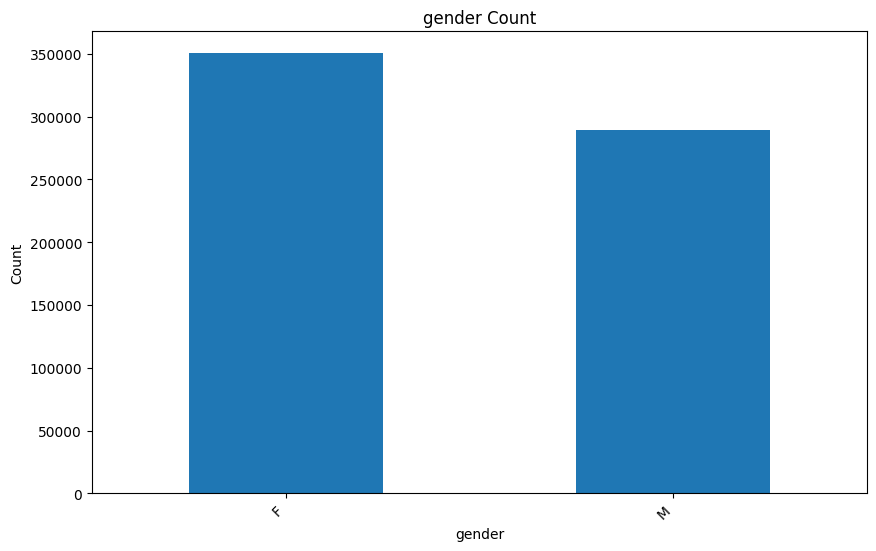

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
Exited_counts = dt["gender"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("gender")
plt.ylabel("Count")
plt.title("gender Count")
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: ylabel='gender'>

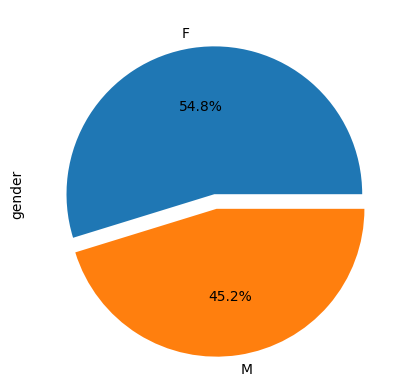

In [16]:
# Plotting the pie chart for gender
dt['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')

<Axes: ylabel='category'>

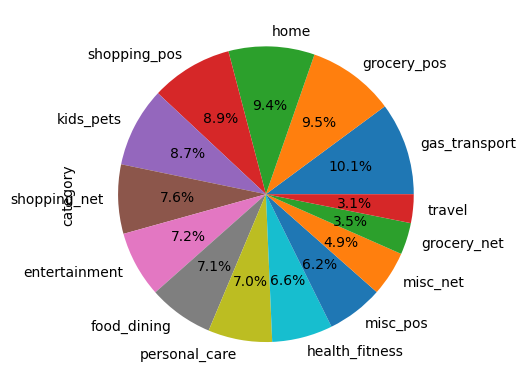

In [17]:
# Plotting the pie chart for category
dt['category'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='is_fraud'>

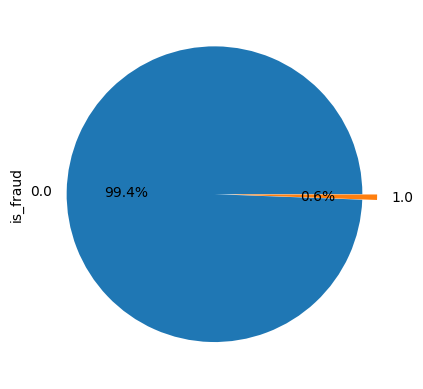

In [18]:
# Plotting the pie chart for is_fraud
dt['is_fraud'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')

In [19]:
print(dt['is_fraud'].value_counts())

0.0    636043
1.0      3795
Name: is_fraud, dtype: int64


In [20]:
#Drop unnecessary columns
dataset = dt.drop(["job" , "gender","last","first","category","amt","Unnamed: 0","merchant","street","zip","cc_num","unix_time","trans_num"] , axis = 1)
dataset.head()

,trans_date_trans_time,city,state,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,Moravian Falls,NC,36.0788,-81.1781,3495.0,1988-03-09,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,Orient,WA,48.8878,-118.2105,149.0,1978-06-21,49.159047,-118.186462,0.0
2,2019-01-01 00:00:51,Malad City,ID,42.1808,-112.2620,4154.0,1962-01-19,43.150704,-112.154481,0.0
3,2019-01-01 00:01:16,Boulder,MT,46.2306,-112.1138,1939.0,1967-01-12,47.034331,-112.561071,0.0
4,2019-01-01 00:03:06,Doe Hill,VA,38.4207,-79.4629,99.0,1986-03-28,38.674999,-78.632459,0.0


**Data Preprocessing**

In [21]:
dataset['trans_date_trans_time']=pd.to_datetime(dataset['trans_date_trans_time'])
dataset['trans_date']=dataset['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
dataset['trans_date']=pd.to_datetime(dataset['trans_date'])
dataset['dob']=pd.to_datetime(dataset['dob'])

In [22]:
#Calculate Age
dataset["age"] = dataset["trans_date"]-dataset["dob"]
dataset["age"]=dataset["age"].astype('timedelta64[Y]')

In [23]:
# Get Transaction Month & Year
dataset['trans_month'] = pd.DatetimeIndex(dataset['trans_date']).month
dataset['trans_year'] = pd.DatetimeIndex(dataset['trans_date']).year

In [24]:
#Calculate distance between merchant and home location
dataset['latitudinal_distance'] = abs(round(dataset['merch_lat']-dataset['lat'],3))
dataset['longitudinal_distance'] = abs(round(dataset['merch_long']-dataset['long'],3))

In [25]:
#Drop Columns that are not relevant to predicy fraud transaction
drop_columns = ['trans_date_trans_time','city','lat','long','dob','merch_lat','merch_long','trans_date','state']
dataset.drop(columns=drop_columns,inplace=True)

In [26]:
dataset.head()

,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance
0,3495.0,0.0,30.0,1,2019,0.068,0.870
1,149.0,0.0,40.0,1,2019,0.271,0.024
2,4154.0,0.0,56.0,1,2019,0.970,0.108
3,1939.0,0.0,51.0,1,2019,0.804,0.447
4,99.0,0.0,32.0,1,2019,0.254,0.830


**Model Building**

In [27]:
X=dataset.drop(columns=['is_fraud'])
y=dataset['is_fraud']

In [28]:
X

,city_pop,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance
0,3495.0,30.0,1,2019,0.068,0.870
1,149.0,40.0,1,2019,0.271,0.024
2,4154.0,56.0,1,2019,0.970,0.108
3,1939.0,51.0,1,2019,0.804,0.447
4,99.0,32.0,1,2019,0.254,0.830
...,...,...,...,...,...,...
639834,224256.0,35.0,10,2020,0.998,0.733
639835,1526206.0,48.0,10,2020,0.742,0.362
639836,6841.0,21.0,10,2020,0.180,0.362
639837,1131.0,61.0,10,2020,0.105,0.689


In [29]:
X1 = X.dropna()

In [30]:
Y1=y.dropna()

In [31]:
Y1

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
639834    0.0
639835    0.0
639836    0.0
639837    0.0
639838    0.0
Name: is_fraud, Length: 639838, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=100)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
# Initialize and fit the Decision Tree classifier on the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = clf.predict(X_test)
# Generate a classification report
report = classification_report(y_test, y_pred)
# Print the classification report
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    127194
         1.0       0.23      0.24      0.23       774

    accuracy                           0.99    127968
   macro avg       0.61      0.62      0.61    127968
weighted avg       0.99      0.99      0.99    127968



In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test,y_pred , average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.990711809678689
Recall: 0.9904351087771943
Accuracy: 0.9904351087771943


In [36]:
# Print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[126559    635]
 [   589    185]]
